## Decision Tree
#### Decision tree is a supervised machine learning algorithm used for classification problem. It is need when the dataset consist of class labelled trainig data. Here each internal node depicts a test or an attribute and each  branch corresponds to the result of the test.

## Structure of Decision Tree
#### 1. Root nodes : It is the top most node in the tree. It represents entire population/sample and it can be further divided into sub-populations
#### 2. Branching/Splitting: The process of dividing a node into two or more sub-population mainly with the help of a <i><b>branch</b></i>
#### 3. Leaf nodes: Nodes that cannot be splitted further
#### 4. Desicion Nodes: When a sub-node splits further into sub-node.


![Desicion Tree Structure](Dt_structure.png)

### An example of how a decision tree looks like:
![Desicion Tree example](Dt_example.jpg)

### Now let's implement the decision tree algorithm 

## Problem Statement

#### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [137]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [138]:

delimiter=";"
data = pd.read_csv("/Users/ambigaur/Desktop/Ambi_coding/python/Prasunet_DS/bank-additional-full.csv", sep= delimiter)
df = pd.DataFrame(data)

In [ ]:
#from IPython.display import display
#display(df)

#### Performing exploratory data analysis

In [139]:
df.select_dtypes(include='number').head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [140]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [141]:
pip install --upgrade scikit-learn

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
^C
ERROR: Operation cancelled by user

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Since here we have a list of categorical data we have to encode the data into binary integer form or non- binary integer form. Here we are going to perform label encoding 

In [142]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

#### Here we can use OrdinalEncoder in place of labelEncoder if we want to.

In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [144]:
categorical_columns= ["job", "marital", "education", "default","housing","loan", "contact", "month", "day_of_week", "poutcome", "y"]
#trans = LabelEncoder()
transformer = ColumnTransformer(transformers=[("encoder",OrdinalEncoder(), categorical_columns)], remainder='passthrough')


Here we are using the Ordinal Encoder in place of labelEncoder since it's giving the error: "LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given" which occurs specifically with LabelEncoder when used within a ColumnTransformer due to the way ColumnTransformer interacts with transformers. This is because LabelEncoder expects only one positional argument (the data to be encoded), but ColumnTransformer might inadvertently pass additional arguments during its processing.On the other hand, OrdinalEncoder does not encounter this issue because it is designed to work directly with ColumnTransformer and similar structures in scikit-learn. OrdinalEncoder inherently handles the transformation of multiple columns in one go, which aligns well with the mechanics of ColumnTransformer.

To conclude while LabelEncoder expects a single column input and can encounter issues when used directly within ColumnTransformer, OrdinalEncoder is structured to handle multiple columns at once and is thus compatible with ColumnTransformer without encountering the same positional argument error. This design difference ensures that OrdinalEncoder can be seamlessly integrated into more complex preprocessing pipelines involving ColumnTransformer.

In [145]:
encoded_data= transformer.fit_transform(df)

In [146]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

In [147]:
encoded_feature_names= [f'{col}' for col in categorical_columns]
all_features_name =  encoded_feature_names + numeric_columns

In [148]:
encoded_df = pd.DataFrame(encoded_data, columns= all_features_name)
train_data, test_data = train_test_split(encoded_df, test_size=0.2, random_state=42)

In [ ]:
encoded_df.head()

In [ ]:
encoded_df.info()

#### X contains all the columns except the last one while y contains the last columns only

In [149]:
input= train_data.drop(columns=['y'])
target=train_data[['y']].rename(columns={'y':'y'})

In [150]:
input.sample(10)
#input.info()


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
13910,0.0,2.0,6.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,32.0,306.0,2.0,999.0,0.0,1.4,93.918,-42.7,4.963,5228.1
29332,2.0,1.0,5.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,46.0,65.0,3.0,999.0,0.0,-1.8,93.075,-47.1,1.405,5099.1
22225,3.0,1.0,6.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,54.0,297.0,1.0,999.0,0.0,1.4,93.444,-36.1,4.963,5228.1
23369,9.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,46.0,516.0,2.0,999.0,0.0,1.4,93.444,-36.1,4.964,5228.1
13643,1.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,2.0,1.0,31.0,136.0,1.0,999.0,0.0,1.4,93.918,-42.7,4.963,5228.1
18337,0.0,2.0,5.0,1.0,2.0,0.0,0.0,3.0,2.0,1.0,27.0,114.0,2.0,999.0,0.0,1.4,93.918,-42.7,4.968,5228.1
27456,0.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,0.0,36.0,85.0,1.0,999.0,1.0,-0.1,93.200,-42.0,4.021,5195.8
8534,0.0,1.0,6.0,0.0,2.0,0.0,1.0,4.0,4.0,1.0,30.0,299.0,1.0,999.0,0.0,1.4,94.465,-41.8,4.864,5228.1
15255,0.0,0.0,6.0,0.0,2.0,0.0,0.0,3.0,2.0,1.0,45.0,1673.0,2.0,999.0,0.0,1.4,93.918,-42.7,4.958,5228.1
37139,8.0,2.0,3.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0,24.0,79.0,1.0,999.0,0.0,-2.9,92.201,-31.4,0.884,5076.2


In [151]:
target.sample(10)

,y
35818,0.0
37380,0.0
21082,0.0
37746,0.0
8775,0.0
12420,0.0
36883,1.0
10195,0.0
12849,0.0
29414,0.0


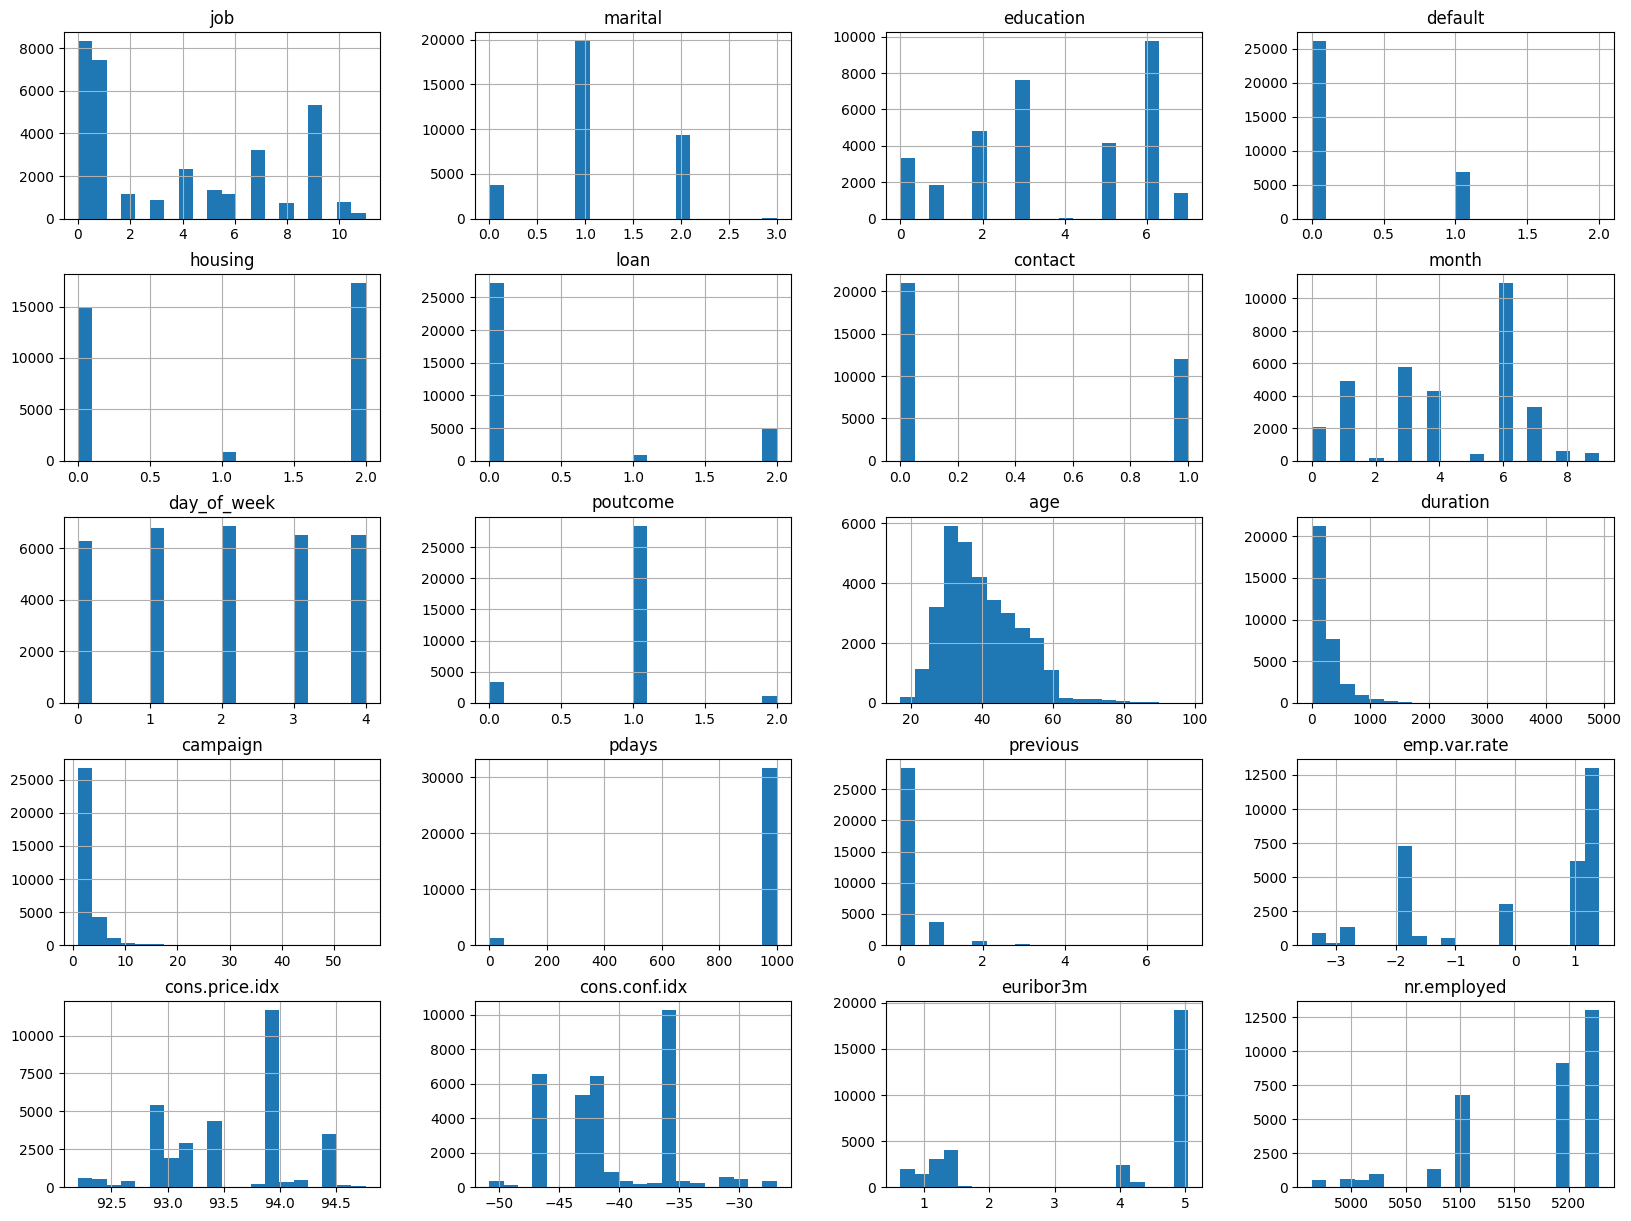

In [152]:
input.hist(bins=20, figsize=(20,15))
plt.show()

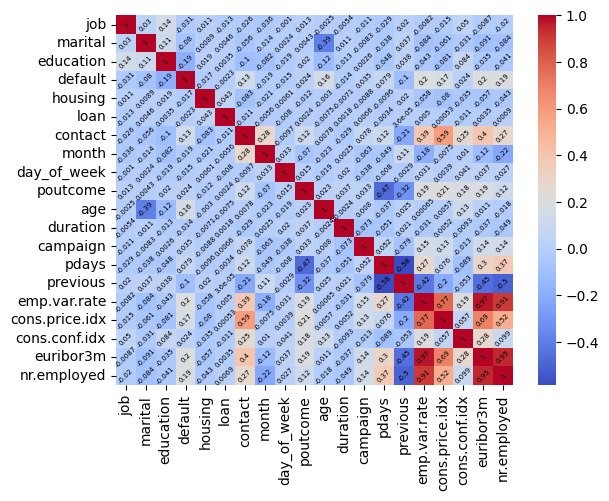

<Figure size 400000x400000 with 0 Axes>

In [153]:
heatmap= sns.heatmap(input.corr(),annot=True,cmap='coolwarm')
plt.figure(figsize=(4000, 4000))
for text in heatmap.texts:
    text.set_size(5)  # Set font size
    text.set_color('black')  # Set text color
    text.set_rotation(45)  # Rotate text
plt.show()

Correlation between various features with target 'Y'

In [154]:

correlations = encoded_df.corr()['y'].drop('y')
correlations

job               0.025122
marital           0.046203
education         0.057799
default          -0.099352
housing           0.011552
loan             -0.004909
contact          -0.144773
month            -0.006065
day_of_week       0.015967
poutcome          0.129789
age               0.030399
duration          0.405274
campaign         -0.066357
pdays            -0.324914
previous          0.230181
emp.var.rate     -0.298334
cons.price.idx   -0.136211
cons.conf.idx     0.054878
euribor3m        -0.307771
nr.employed      -0.354678
Name: y, dtype: float64

In [155]:
from sklearn.tree import DecisionTreeClassifier

In [156]:
model= DecisionTreeClassifier(random_state=42)
model.fit(input, target)

DecisionTreeClassifier(random_state=42)

In [157]:
train_prediction= model.predict(input)

In [158]:
train_prediction

array([0., 0., 0., ..., 1., 0., 0.])

In [159]:
pd.value_counts(train_prediction)

/var/folders/4p/wr7wrzgx2n974cn269fjsbzr0000gn/T/ipykernel_33688/1024936929.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_prediction)


0.0    29245
1.0     3705
Name: count, dtype: int64

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [161]:
accuracy_score(train_prediction, target)

1.0

#### We are getting 100% accuracy on training data now lets move on to check the same on testing dataset 

In [ ]:
'''delimiter=';'
tdata= pd.read_csv("/Users/ambigaur/Desktop/Ambi_coding/python/Prasunet_DS/bank-additional.csv", sep= delimiter)
tdf= pd.DataFrame(tdata)
categorical_columns= ["job", "marital", "education", "default","housing","loan", "contact", "month", "day_of_week", "poutcome", "y"]
#trans = LabelEncoder()
transformer = ColumnTransformer(transformers=[("encoder",OrdinalEncoder(), categorical_columns)], remainder='passthrough')
tf_data= transformer.fit_transform(tdf)
numeric_tdf = tdf.select_dtypes(include='number').columns.tolist()
encoded_tfeature= [f'{col}' for col in categorical_columns]
all_tfeature = encoded_tfeature + numeric_tdf
test_data = pd.DataFrame(tf_data, columns= all_tfeature) '''

In [162]:
test_input= test_data.drop(columns=['y'])
test_target= test_data[['y']].rename({'y':'y'})

In [163]:
test_preds = model.predict(test_input)

In [164]:
accuracy_score(test_preds, test_target)

0.8889293517844137

In [165]:
model.score(test_input, test_target)

0.8889293517844137

#### Now we shall visualise the decision tree 

In [166]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.9, 'nr.employed <= 5087.65\ngini = 0.2\nsamples = 32950\nvalue = [29245, 3705]'),
 Text(0.25, 0.7, 'duration <= 165.5\ngini = 0.494\nsamples = 3976\nvalue = [2199, 1777]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'pdays <= 7.5\ngini = 0.274\nsamples = 1440\nvalue = [1204, 236]'),
 Text(0.0625, 0.3, 'day_of_week <= 1.5\ngini = 0.478\nsamples = 190\nvalue = [115, 75]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'duration <= 123.5\ngini = 0.224\nsamples = 1250\nvalue = [1089, 161]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'pdays <= 15.5\ngini = 0.477\nsamples = 2536\nvalue = [995, 1541]'),
 Text(0.3125, 0.3, 'campaign <= 6.5\ngini = 0.304\nsamples = 745\nvalue = [139, 606]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'duration <= 264.5\ngini = 0.499\nsamples = 1791\nvalue = [856, 935]'),
 Text(0.40625, 0.1, '\n

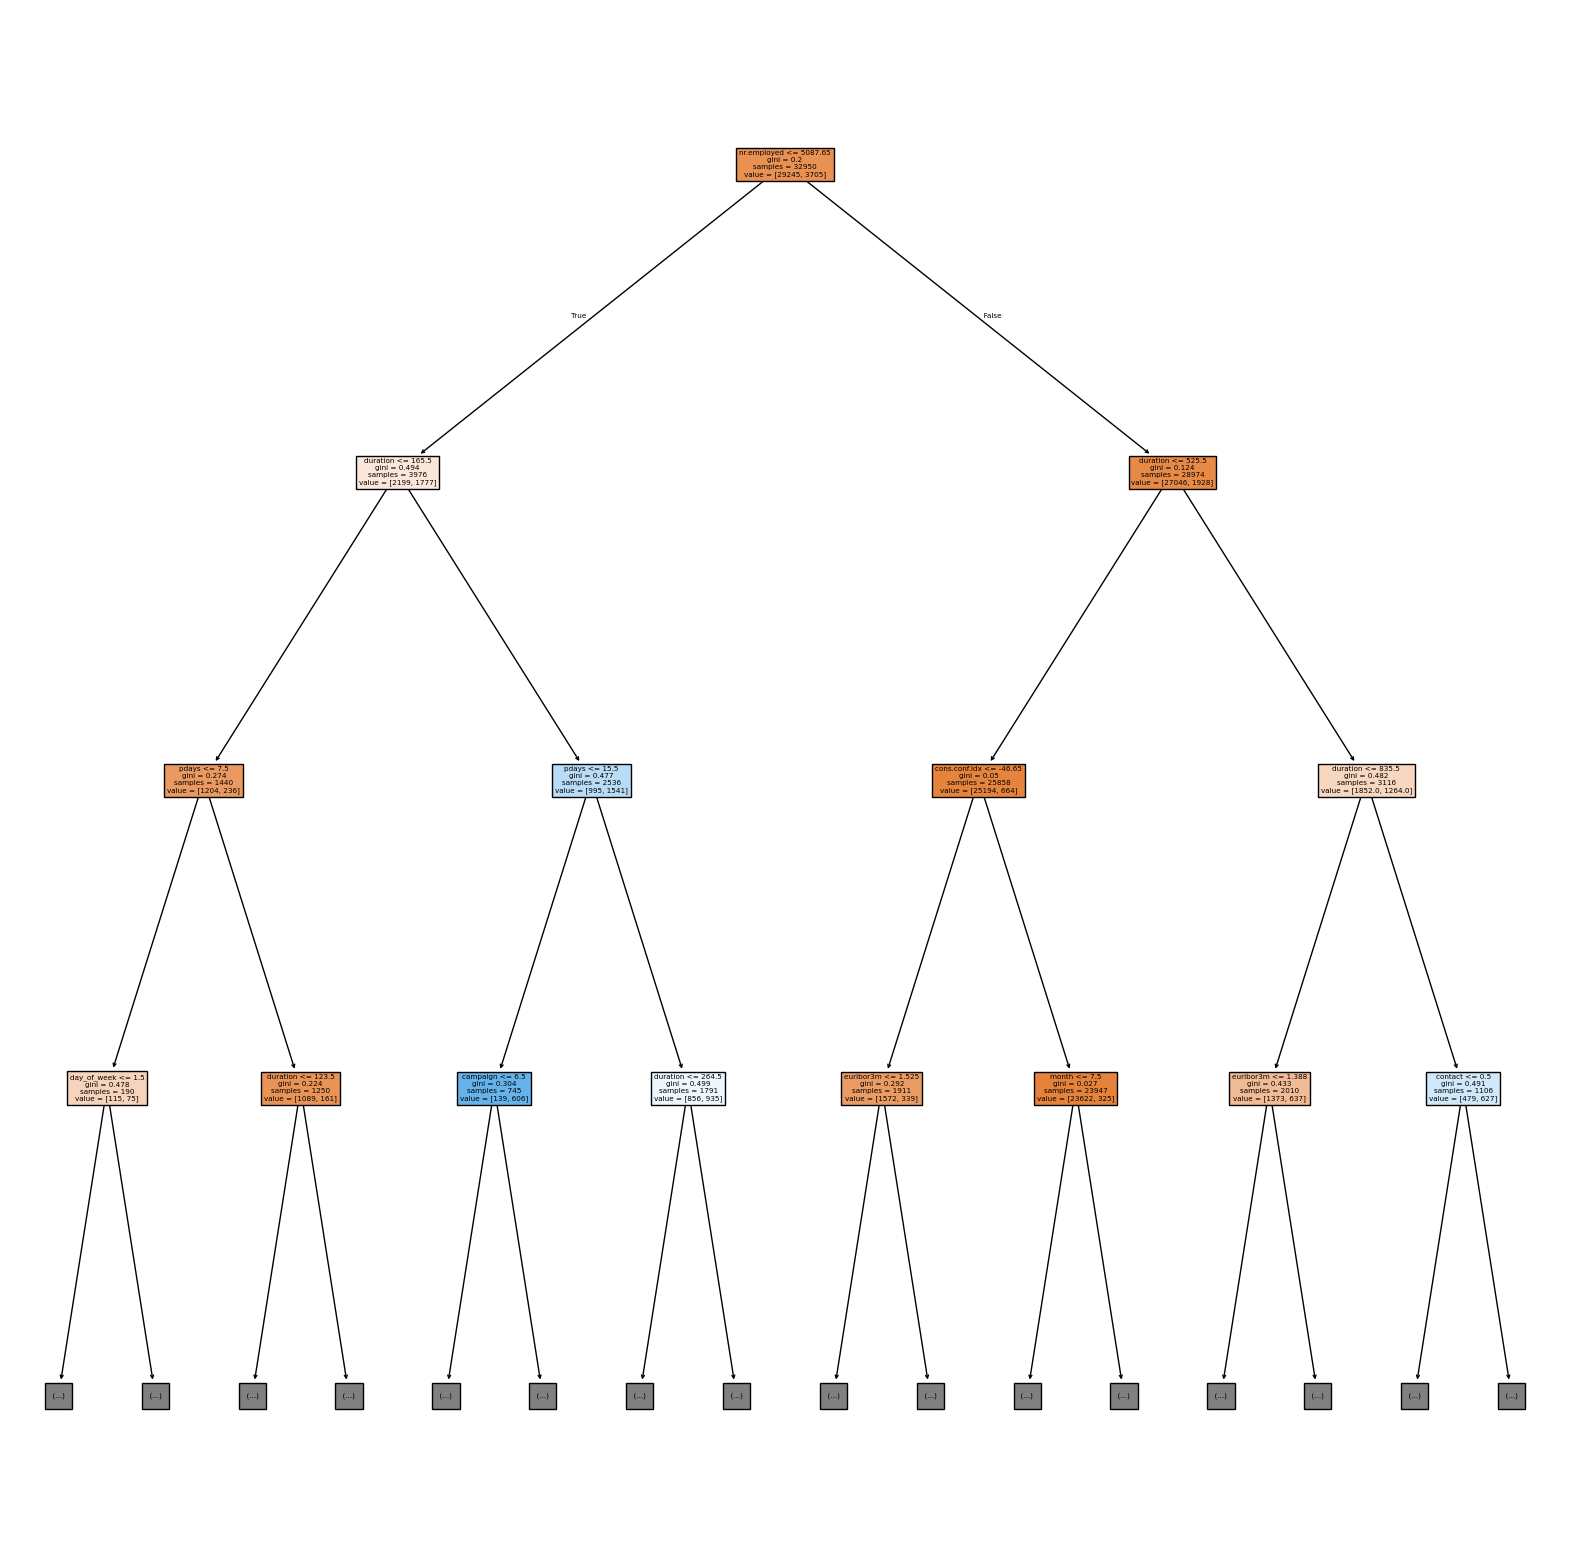

In [167]:
plt.figure(figsize=(20,20))
plot_tree(model, feature_names= input.columns, max_depth= 3, filled=True)